# __Supervised Learning__

There are two major types of supervised machine learning problems:
- Classification
- Regression

In __classification__ the goal is to preidct a class label, which is a choice from a __predefined__ list of
possibilities. __Classification__ is sometimes separated into __binary classification__, which is the special case of distinguishing between exactly two classes, and __multiclass classification__. which is classification between more than two classes.

In binary classification we often speak of one class being the posi‐
tive class and the other class being the negative class. Here, positive
doesn’t represent having benefit or value, but rather what the object
of the study is. So, when looking for spam, “positive” could mean
the spam class. Which of the two classes is called positive is often a
subjective matter, and specific to the domain.

For __regression__ tasks, the goal is to predict a __continuous__ number, or a __floating-point__
number in programming terms (or real number in mathematical terms).

If a _model_ is able to make accurate predictions on unseen data, we say it is able to __generalize__ from the training set to the test set.

Building a model that is too complex for the amount of information we have is called __overfitting__.

Choosing too simple a model is called __underfitting__.

The more complex we allow our model to be, the better we will be able to predict on
the training data. However, if our model becomes too complex, we start focusing too
much on each individual data point in our training set, and the model will not gener‐
alize well to new data.
There is a sweet spot in between that will yield the best generalization performance.
This is the model we want to find.

#### __Relation of Model Complexity to Dataset Size__
It’s important to note that model complexity is intimately tied to the variation of
inputs contained in your training dataset: the larger variety of data points your data‐
set contains, the more complex a model you can use without overfitting. Usually, col‐
lecting more data points will yield more variety, so larger datasets allow building
more complex models. However, simply duplicating the same data points or collect‐
ing very similar data will not help.

## __Some common Supervised Learning Algorithms__

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


X.shape: (26, 2)


/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


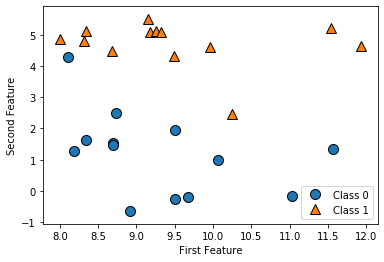

In [1]:
# create a dataset to pay with for Binary Classification 
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()

# plot the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print(f'X.shape: {X.shape}')

Text(0, 0.5, 'Target')

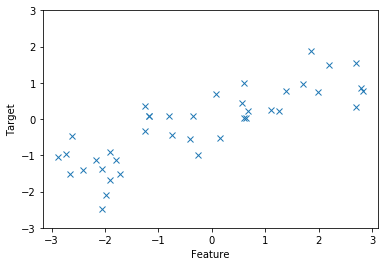

In [2]:
# create a dataset to pay with for Regression
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'x')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [3]:
# we will also use the Cancer and Boston Housing datasets
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

### __K - Nearest Neighbors__ (Classification)

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

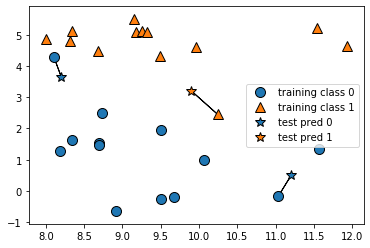

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


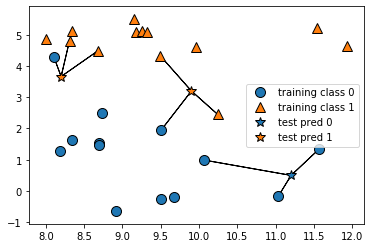

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

While this illustration is for a binary classification problem, this method can be
applied to datasets with any number of classes. For more classes, we count how many
neighbors belong to each class and again predict the most common class.

In [6]:
# implement KNN with scikit learn
from sklearn.model_selection import train_test_split

In [7]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [8]:
# import classifier class and initialize it
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [9]:
# fit the classifier or model to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
# Evaluate model
print(f'test accuracy: {classifier.score(X_test, y_test):.2f}')

test accuracy: 0.86


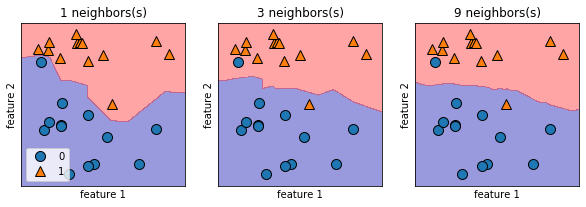

In [11]:
# plotting the decisions boundary for the KNN classifier
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can
    # instantiate and fit one line
    classifier = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(classifier, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(f'{n_neighbors} neighbors(s)')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

axes[0].legend(loc = 3)
plt.show()

As you can see on the left in the figure, using a single neighbor results in a decision
boundary that follows the training data closely. Considering more and more neigh bors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model com plexity.

If you
consider the extreme case where the number of neighbors is the number of all data
points in the training set, each test point would have exactly the same neighbors (all
training points) and all predictions would be the same: the class that is most frequent
in the training set.

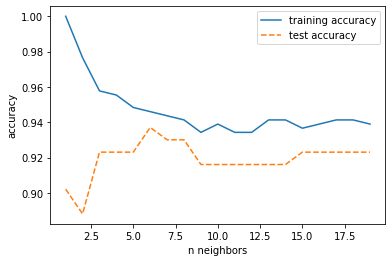

In [12]:
# Evaluate training and test set performance with different numbers
# of neighbors with the cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label = 'training accuracy', )
plt.plot(neighbors_settings, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n neighbors')
plt.legend()
plt.show()

#### __K - Nearest Neighbors__ (Reggresion)

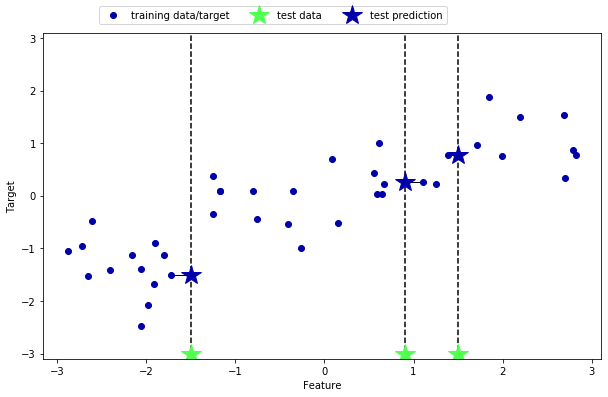

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

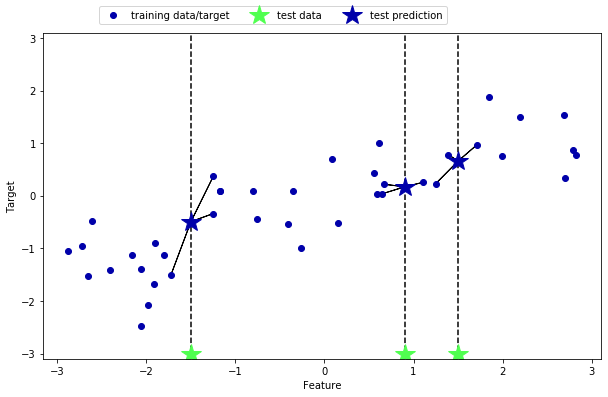

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

When using
multiple nearest neighbors, the prediction is the average, or mean, of the relevant
neighbors

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn . It’s used similarly to KNeighborsClassifier :

In [15]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# instantiate the model and set the number of neighbors to consider to 3
reggresion = KNeighborsRegressor(n_neighbors = 3)

# fit the regressor
reggresion.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
# evaluate the modeñ
print(f'test set r_squared: {reggresion.score(X_test, y_test):.2f}')

test set r_squared: 0.83


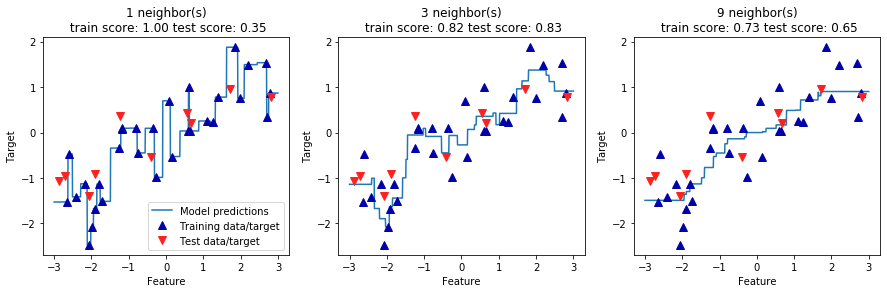

In [17]:
# Analyzing KNeighbors Regressor
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# create 1,000 datapoints evenly spaced between -3 and 3
import numpy as np
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    regression = KNeighborsRegressor(n_neighbors = n_neighbors)
    regression.fit(X_train, y_train)
    ax.plot(line, regression.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    train_score, test_score = regression.score(X_train, y_train), regression.score(X_test, y_test)
    ax.set_title(f'{n_neighbors} neighbor(s)\n train score: {train_score:.2f} test score: {test_score:.2f}')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = 'best')
plt.show()

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, Euclidean distance is used, which works
well in many settings.

This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).

### __Linear Models for Regression__

For regression, the general prediction formila for a linear model looks as follows:

$$ \hat{y} = w[0] x [0] + w[1]x[1] + ... + w[p]x[p] + b $$

Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w and b are parameters of the model that are learned, and ŷ is
the prediction the model makes.

Here, w[0] is the slope and b is the y-axis offset. For more features, w contains the
slopes along each feature axis. Alternatively, you can think of the predicted response
as being a weighted sum of the input features, with weights (which can be negative)
given by the entries of w.

w[0]: 0.393906  b: -0.031804


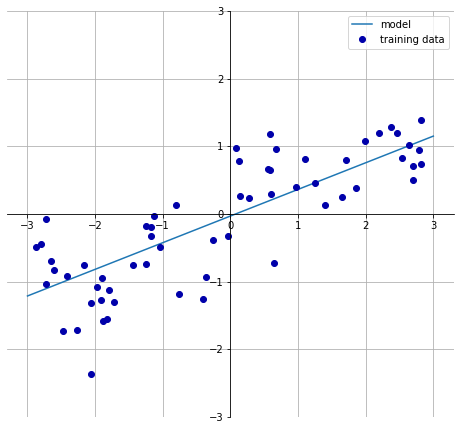

In [18]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

If you compare the predictions made by the straight line with those made by the
KNeighborsRegressor using a straight line to make predictions seems
very restrictive. It looks like all the fine details of the data are lost. In a sense, this is
true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear
combination of the features. But looking at one-dimensional data gives a somewhat
skewed perspective. For datasets with many features, linear models can be very powerful.
In particular, if you have more features than training data points, any target y
can be perfectly modeled (on the training set) as a linear function.

Linear regression, or ordinary least squares (OLS), is the simplest and most classic lin‐
ear method for regression. Linear regression finds the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

In [19]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# instantiate and fit to train set
lr = LinearRegression().fit(X_train, y_train)

In [20]:
# print attributes of the model
print(f'coefficient: {lr.coef_}')
print(f'interception: {lr.intercept_:.2f}')

coefficient: [0.39390555]
interception: -0.03


You might notice the strange-looking trailing underscore at the end
of coef_ and intercept_ . scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.

In [21]:
# evaluate performance
print(f'training set score: {lr.score(X_train, y_train):.2f}')
print(f'test set score: {lr.score(X_train, y_train):.2f}')

training set score: 0.67
test set score: 0.67


An r_quared of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [22]:
# loading extended boston and fitting with a LinearRegression
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [23]:
print(f'training set score: {lr.score(X_train, y_train):.2f}')
print(f'test set score: {lr.score(X_test, y_test):.2f}')


training set score: 0.95
test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression,

#### __Ridge Regression__

In __ridge__ regression,
though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as __L2 regularization__. Mathematically, Ridge penalizes the __L2__ norm of the coefficients, or the __Euclidean length__ of w.

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f'training set score: {ridge.score(X_train, y_train):.2f}')
print(f'test set score: {ridge.score(X_test, y_test):.2f}')

training set score: 0.89
test set score: 0.75


As you can see, the training set score of Ridge is lower than for LinearRegression ,
while the test set score is higher. This is consistent with our expectation. With linear
regression, we were overfitting our data. __Ridge__ is a more __restricted__ model, so we are
_less likely_ to __overfit__.

As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter.

The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [25]:
# initialize regressor with alpha parameter to 10
# and fitting to training dataset
ridge_alpha_10 = Ridge(alpha = 10).fit(X_train, y_train)

In [26]:
print(f'training set score: {ridge_alpha_10.score(X_train, y_train):.2f}')
print(f'test set score: {ridge_alpha_10.score(X_test, y_test):.2f}')

training set score: 0.79
test set score: 0.64


For very small values of alpha , coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:

In [27]:
ridge_alpha_0p1 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge_alpha_0p1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_alpha_0p1.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can also get a more qualitative insight into how the alpha parameter changes the
model by inspecting the coef_ attribute of models with different values of alpha . A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha.

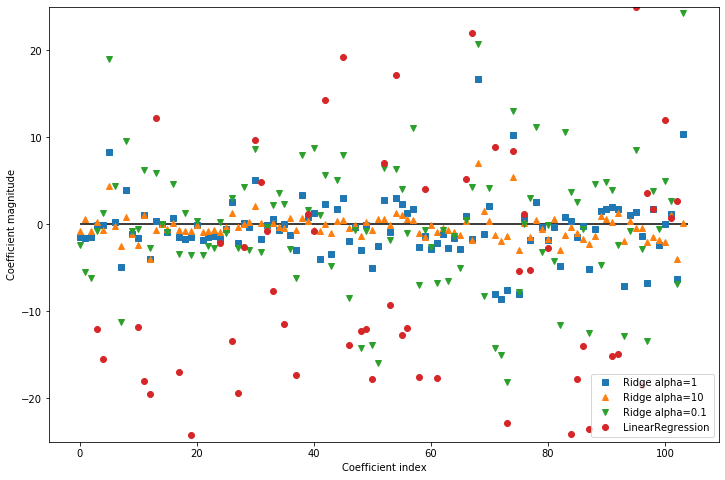

In [28]:
plt.figure(figsize = (12, 8))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge_alpha_10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge_alpha_0p1.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of coef_ : x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on
up to x=100 . The y-axis shows the numeric values of the corresponding values of the
coefficients. The main takeaway here is that for alpha=10 , the coefficients are mostly
between around –3 and 3. The coefficients for the Ridge model with alpha=1 are
somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
and many of the dots corresponding to linear regression without any regularization
(which would be alpha=0 ) are so large they are outside of the chart.

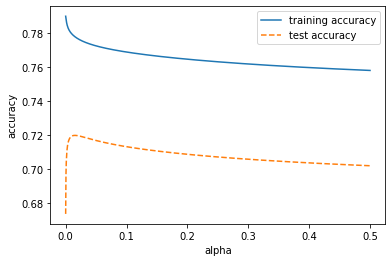

In [29]:
# Evaluate training and test set performance with different alpha
# parameter in the Ridge regressor
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
import numpy as np
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
alpha_params = np.linspace(0, 0.5, 1000)

for alpha in alpha_params:
    # build the model
    model = Ridge(alpha = alpha)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(alpha_params, training_accuracy, label = 'training accuracy', )
plt.plot(alpha_params, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.legend()
plt.show()

Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available.

We subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (plots that show model performance as a function of dataset
size are called __learning curves__)

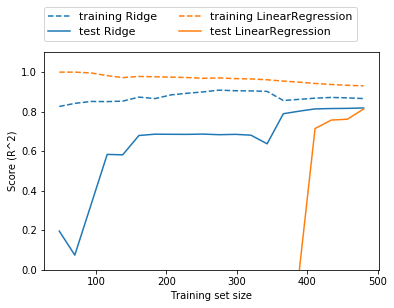

In [30]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that __with enough training data, regularization becomes less important, and given enough data, ridge and
linear regression will have the same performance__.
If more data
is added, it becomes harder for a model to overfit, or memorize the data.

#### __Lasso__

An alternative to Ridge for regularizing linear regression is Lasso . As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called __L1 regularization__. The lasso penalizes the __L1__ norm of the coefficient vector - or in other words, the sum of the absolute values of
the coefficients.

The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [31]:
# apply Lasso to the extended Boston Housing dataset
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.56
Test set score: 0.50
Number of features used: 2


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge , the Lasso also has a regularization parameter, alpha , that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0 . To reduce underfitting, let’s try decreasing alpha . When we
do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run)

In [32]:
lasso_alpha_0p01 = Lasso(alpha = 0.01, max_iter = 1000000).fit(X_train, y_train)
print(f"Training set score: {lasso_alpha_0p01.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso_alpha_0p01.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso_alpha_0p01.coef_ != 0)}")

Training set score: 0.70
Test set score: 0.66
Number of features used: 8


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. This makes this model potentially easier to under‐
stand.
If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression :

In [33]:
lasso_alpha_0p0001 = Lasso(alpha = 0.0001, max_iter = 1000000).fit(X_train, y_train)
print(f"Training set score: {lasso_alpha_0p0001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso_alpha_0p0001.score(X_test, y_test):.2f}")
print(f"Number of features used: {np.sum(lasso_alpha_0p0001.coef_ != 0)}")

Training set score: 0.77
Test set score: 0.72
Number of features used: 22


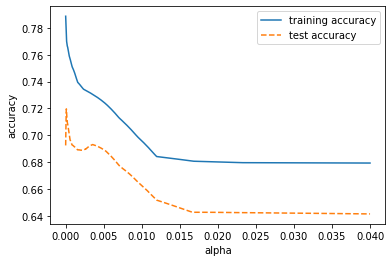

In [34]:
# Evaluate training and test set performance with different alpha
# parameter in the Ridge regressor
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
import numpy as np


training_accuracy = []
test_accuracy = []
alpha_params = np.linspace(0.00001, 0.04, 10000)

for idx, alpha in enumerate(alpha_params):
    print(f'Processing model {idx}/{len(alpha_params)}', end = '\r')
    # build the model
    model = Lasso(alpha = alpha, max_iter = 10000000)
    # fit to training set
    model.fit(X_train, y_train)
    # record training and test sets accuracies
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(alpha_params, training_accuracy, label = 'training accuracy', )
plt.plot(alpha_params, test_accuracy,'--', label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.legend()
plt.show()

Again, we can plot the coefficients of the different models

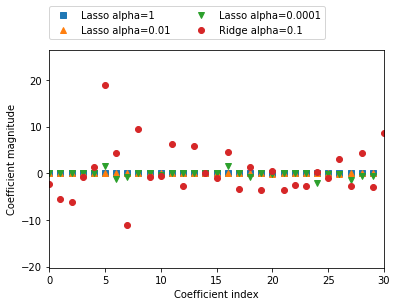

In [35]:
plt.figure()
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso_alpha_0p01.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso_alpha_0p0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge_alpha_0p1.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlim(0, 30)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to under‐
stand, as it will select only a subset of the input features. scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge . In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.

### __Linear models for classification__

__Linear models are also extensively used for classification__. Let’s look at binary classifi‐
cation first. In this case, a prediction is made using the following formula:

$$ \hat{y} = x[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0 $$

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class $ –1 $; if it is larger than zero, we
predict the class $ +1 $. This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients $ (w) $  and the intercept $ (b) $.

For linear models for regression, the output, $ ŷ $, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). __For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.__

There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:
 - The way in which they measure how well a particular combination of coefficients
and intercept fits the training data
 - If and what kind of regularization they use

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression , and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm, and it should not be confused with LinearRegression.

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


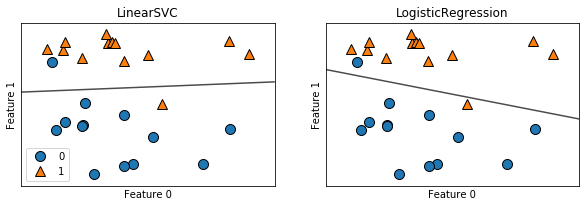

In [36]:
# apply logistic reggresion and linearSVC to the forge dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    classifier = model.fit(X, y)
    mglearn.plots.plot_2d_separator(classifier, X, fill = False, eps = 0.5,
                                    ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(f'{classifier.__class__.__name__}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend()
plt.show()

We display the decision boundaries found by
LinearSVC and LogisticRegression respectively as straight lines, separating the area
classified as class 1 on the top from the area classified as class 0 on the bottom. In
other words, any new data point that lies above the black line will be classified as class
1 by the respective classifier, while any point that lies below the black line will be classified as class 0.

The two models come up with similar decision boundaries. Note that both misclas‐
sify two of the points. By default, both models apply an __L2__ regularization, in the same
way that Ridge does for regression.
For __LogisticRegression__ and __LinearSVC__ the __trade-off parameter that determines the
strength of the regularization is called C__, and higher values of C correspond to less
regularization. In other words, when you use a high value for the parameter  C , LogisticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C  , the models put more emphasis on finding a coefficient
vector $ (w) $ that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified correctly.

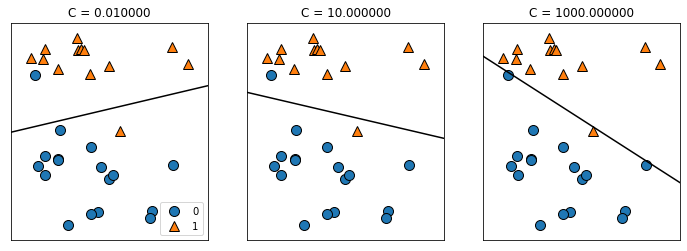

In [37]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization.
Most of the points in class 0 are at the top, and most of the points in class 1 are at the
bottom. The strongly regularized model chooses a relatively horizontal line, misclas‐
sifying two points. In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. Finally, on the right‐
hand side, the very high value of C in the model tilts the decision boundary a lot, now
correctly classifying all points in class 0. One of the points in class 1 is still misclassi‐
fied, as it is not possible to correctly classify all points in this dataset using a straight
line. The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.

Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, __in high dimensions, linear models for classificationbecome very powerful, and guarding against overfitting becomes increasingly important when considering more features.__

In [38]:
# analyze LinearLogistic in more detail
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42
)


In [39]:
logreg = LogisticRegression(max_iter = 100000).fit(X_train, y_train)
print(f'training set score: {logreg.score(X_train, y_train):.3f}')
print(f'test set score: {logreg.score(X_test, y_test):.3f}')

training set score: 0.958
test set score: 0.958


In [40]:
logreg_100 = LogisticRegression(C = 100, max_iter = 100000).fit(X_train, y_train)
print(f'training set score: {logreg_100.score(X_train, y_train):.3f}')
print(f'test set score: {logreg_100.score(X_test, y_test):.3f}')

training set score: 0.984
test set score: 0.965


Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.
We can also investigate what happens if we use an even more regularized model than
the default of C=1 , by setting C=0.01 :

In [41]:
logreg_0p01 = LogisticRegression(C = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f'training set score: {logreg_0p01.score(X_train, y_train):.3f}')
print(f'test set score: {logreg_0p01.score(X_test, y_test):.3f}')

training set score: 0.953
test set score: 0.951


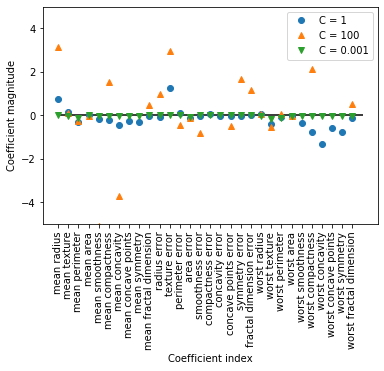

In [42]:
# lets look at the coefficients learned by the models with
# the three different settings of the regularization parameter C
plt.figure()
plt.plot(logreg.coef_.T, 'o', label = 'C = 1')
plt.plot(logreg_100.coef_.T, '^', label = 'C = 100')
plt.plot(logreg_0p01.coef_.T, 'v', label = 'C = 0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()

training accuracy of l1 logreg with C = 0.001: 0.95
test accuracy of l1 logreg with C = 0.001: 0.94
training accuracy of l1 logreg with C = 1.000: 0.96
test accuracy of l1 logreg with C = 1.000: 0.96
training accuracy of l1 logreg with C = 100.000: 0.98
test accuracy of l1 logreg with C = 100.000: 0.97


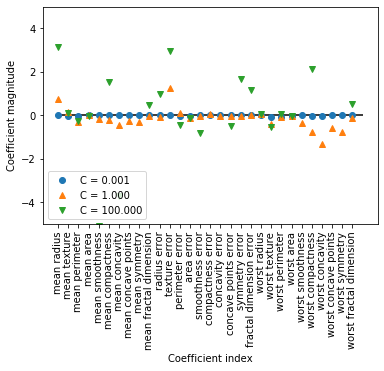

In [43]:
# If we desire a more interpretable model, using L1 regularization might help, as it lim‐
# its the model to using only a few features. Here is the coefficient plot and
# classification accuracies for L1 regularization
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l2 = LogisticRegression(C = C, penalty = 'l2', max_iter = 100000).fit(X_train, y_train)
    print(f'training accuracy of l1 logreg with C = {C:.3f}: {lr_l2.score(X_train, y_train):.2f}')
    print(f'test accuracy of l1 logreg with C = {C:.3f}: {lr_l2.score(X_test, y_test):.2f}')
    plt.plot(lr_l2.coef_.T, marker, label = f'C = {C:.3f}')

# plotting results
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5, 5)
plt.legend(loc = 3)
plt.show()

### __Linear models for multiclass classification__

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the __one-vs.-rest approach__. In the one-vs.-rest approach, __a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.__

The mathematics behind multiclass logistic regression differ somewhat from the one-
vs.-rest approach, but they also result in one coefficient vector and intercept per class,
and the same method of making a prediction is applied.

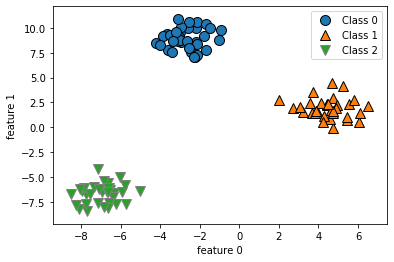

In [44]:
# apply the one-vs-rest method to a simple three class
# classification dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [45]:
# train a LinearSVC classifier on the dataset
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape: ', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the coef_ is (3, 2) , meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.

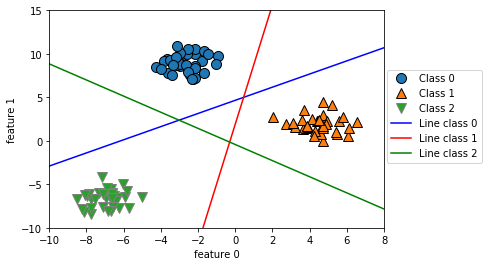

In [46]:
# let's visualize the lines given by the three binary classifiers
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
                'Line class 2'], loc = (1.01, 0.3))

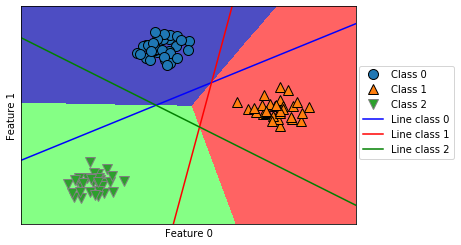

In [47]:
# the following example shows the predictions for all
# the regions of the 2D space
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = 0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


The main parameter of linear models is the regularization parameter, called alpha in
the regression models and C in LinearSVC and LogisticRegression . Large values for
alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for
on a logarithmic scale. The other decision you have to make is whether you want to
use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2.
L1 can also be useful if interpretability of the model is important. As L1 will use only
a few features, it is easier to explain which features are important to the model, and
what the effects of these features are.


Linear models are very fast to train, and also fast to predict. They scale to very large
datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag'
option in LogisticRegression and Ridge , which can be faster than the default on
large datasets. Other options are the SGDClassifier class and the SGDRegressor
class, which implement even more scalable versions of the linear models described
here.


Another strength of linear models is that they make it relatively easy to understand
how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they
are. This is particularly true if your dataset has highly correlated features; in these
cases, the coefficients might be hard to interpret.

## __Naive Bayes Classifiers__

Naive Bayes classifiers are similar to the linear models. They tend to be faster in training. The price paid is these models often provide generalization performance that is slightly worse than
that of linear classifiers.

The reason that naive Bayes models are so efficient is __that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature__.

There are three kinds of naive Bayes classifiers implemented in ```scikit-learn```:
 - ```GaussianNB```
 - ```BernoulliNB```
 - ```MultinomialNB```
 
__GaussianNB__ can be applied to any continuous data, while __BernoulliNB__ assumes binary data and __MultinomialNB__ 
assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). __BernoulliNB__ and __MultinomialNB__
are mostly used in text data classification.

The __BernoulliNB__ classifier counts how often every feature of each class is not zero.
__MultinomialNB__ takes into account the
average value of each feature for each class, while __GaussianNB__ stores the average value
as well as the standard deviation of each feature for each class.

MultinomialNB and BernoulliNB have a single parameter, alpha , which controls
model complexity. The way alpha works is that the algorithm adds to the data alpha
many virtual data points that have positive values for all the features. This results in a
“smoothing” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha , meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat.
GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
usually performs better than BinaryNB , particularly on datasets with a relatively large
number of nonzero features (i.e., large documents).
The naive Bayes models share many of the strengths and weaknesses of the linear
models. They are very fast to train and to predict, and the training procedure is easy
to understand. The models work very well with high-dimensional sparse data and are
relatively robust to the parameters. Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long.

## __Decision Trees__

Decision trees are widely used models for classification and regression tasks. Essen‐
tially, they learn a hierarchy of if/else questions, leading to a decision.

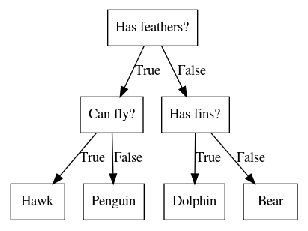

In [48]:
# example of a decision tree
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal
node (also called a leaf) that contains the answer. The edges connect the answers to a
question with the next question you would ask.
In machine learning parlance, we built a model to distinguish between four classes of
animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn
them from data using supervised learning.

Learning a decision tree means learning the sequence of if/else questions that gets us
to the true answer most quickly. In the machine learning setting, these questions are
called tests (not to be confused with the test set, which is the data we use to test to see
how generalizable our model is).

Usually data does not come in the form of binary
yes/no features as in the animal example, but is instead represented as continuous
features. he tests that are used on
continuous data are of the form “Is feature i larger than value a?”

To build a tree, the algorithm searches over all possible tests and finds the one that is
most informative about the target variable.

This recursive process yields a binary tree of decisions, with each node containing a
test. Alternatively, you can think of each test as splitting the part of the data that is
currently being considered along one axis. This yields a view of the algorithm as
building a hierarchical partition. As each test concerns only a single feature, the
regions in the resulting partition always have axis-parallel boundaries.

The recursive partitioning of the data is repeated until each region in the partition
(each leaf in the decision tree) only contains a single target value (a single class or a
single regression value). A leaf of the tree that contains data points that all share the
same target value is called pure.

There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collaps‐
ing nodes that contain little information (also called post-pruning or just pruning).
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and
DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not
post-pruning.

In [49]:
# make a decision tree classifier with sklearn
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42
)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print(f'accuracy on training set: {tree.score(X_train, y_train):.3f}')
print(f'accuracy on test set: {tree.score(X_test, y_test):.3f}')

accuracy on training set: 1.000
accuracy on test set: 0.937


In [50]:
# apply prunning
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print(f'accuracy on training set: {tree.score(X_train, y_train):.3f}')
print(f'accuracy on test set: {tree.score(X_test, y_test):.3f}')

accuracy on training set: 0.988
accuracy on test set: 0.951


#### __Analyzing decision trees__
We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled:

In [51]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'tree.dot', class_names = ['malignant', 'benign'],
               feature_names = cancer.feature_names, impurity = False, filled = True)

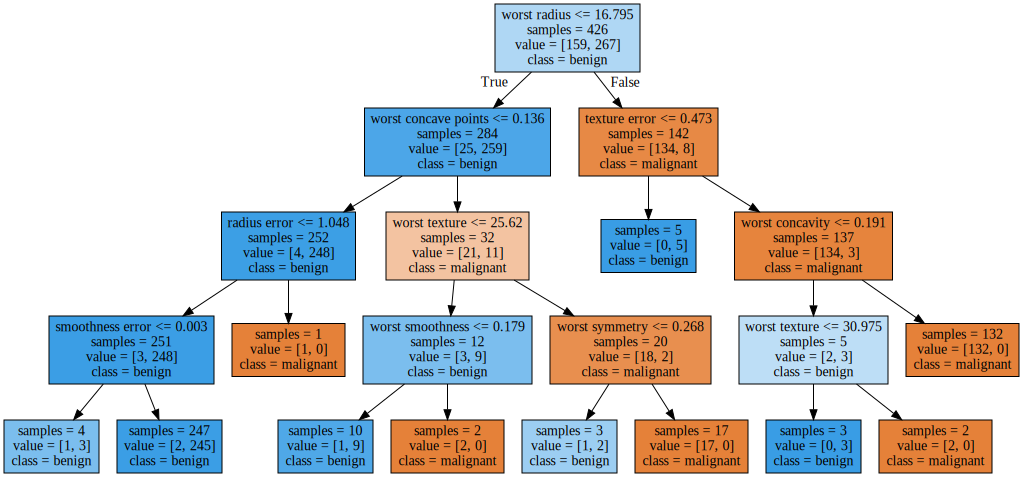

In [52]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

#### __Feature importance in trees__
Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1:

In [53]:
print(f'feature importnaces:\n{tree.feature_importances_}')

feature importnaces:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


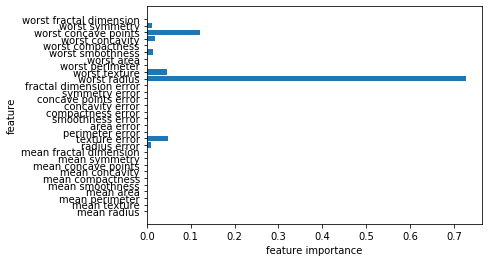

In [54]:
# visualize feature importances
def plot_feature_importances_cancer(model):
    n_features =cancer.data.shape[1]
    plt.barh(range(0, n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    
plot_feature_importances_cancer(tree)

Here we see that the feature used in the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree that the first
level already separates the two classes fairly well.
However, if a feature has a low feature_importance , it doesn’t mean that this feature
is uninformative. It only means that the feature was not picked by the tree, likely
because another feature encodes the same information.

In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of. The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant. In fact, there might not be such a simple relationship between features and class, as you can see in the following example

Feature importances: [0. 1.]


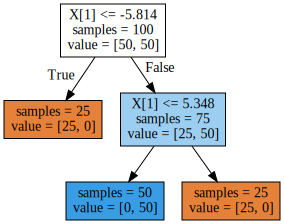

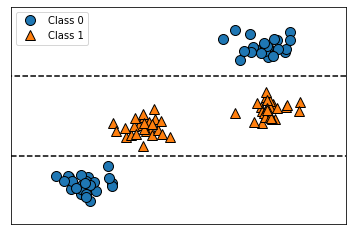

In [55]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of. The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant. In fact, there might not be such a simple relationship between features and class, as you can see in the following example

The usage and analysis of regression trees is very similar to that of
classification trees. There is one particular property of using tree-based models for
regression that we want to point out, though. __The DecisionTreeRegressor (and all
other tree-based regression models) is not able to extrapolate, or make predictions
outside of the range of the training data.__

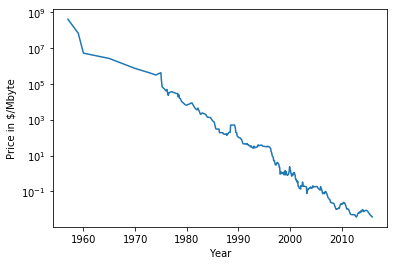

In [56]:
import pandas as pd
ram_prices = pd.read_csv('input/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')
plt.show()

We will make a forecast for the years after 2000 using the historical data up to that
point, with the date as our only feature. We will compare two simple models: a
DecisionTreeRegressor and LinearRegression . We rescale the prices using a logarithm, so that the relationship is relatively linear. This doesn’t make a difference for
the DecisionTreeRegressor , but it makes a big difference for LinearRegression.
After training the models and making
predictions, we apply the exponential map to undo the logarithm transform. We
make predictions on the whole dataset for visualization purposes here, but for a
quantitative evaluation we would only consider the test dataset:


In [57]:
from sklearn.tree import DecisionTreeRegressor

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices['date'] < 2000].copy()
data_test = ram_prices[ram_prices['date'] >= 2000].copy()

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to ttarget
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

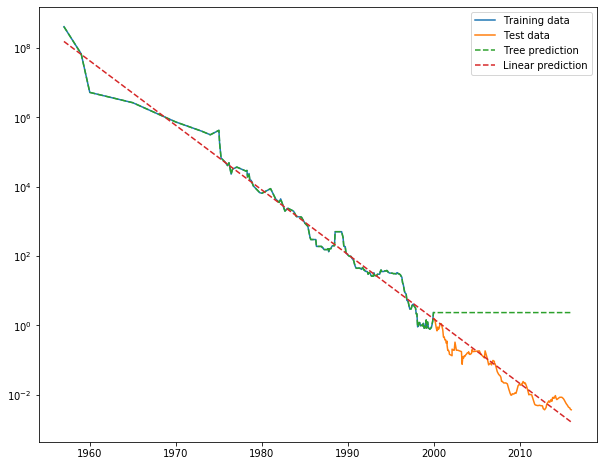

In [58]:
plt.figure(figsize = (10, 8))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, '--', label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, '--', label="Linear prediction")
plt.legend()
plt.show()

The difference between the models is quite striking. The linear model approximates
the data with a line, as we knew it would. This line provides quite a good forecast for
the test data (the years after 2000), while glossing over some of the finer variations in
both the training and the test data. The tree model, on the other hand, makes perfect
predictions on the training data; we did not restrict the complexity of the tree, so it
learned the whole dataset by heart. However, once we leave the data range for which
the model has data, the model simply keeps predicting the last known point. The tree
has no ability to generate “new” responses, outside of what was seen in the training
data.

## __Ensembles of Decision Trees__

_Ensembles_ are __methods that combine multiple machine learning models to create
more powerful models.__

There are two __ensemble models__ that have proven to
be __effective__ on a wide range of datasets for classification and regression, both of
which use decision trees as their building blocks: __random forests__ and __gradient boosted decision trees__.

### __Random forests__

As we just observed, a main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. A random forest
is essentially a collection of decision trees, where each tree is slightly different from
the others. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data. If we build many
trees, all of which work well and overfit in different ways, we can reduce the amount
of overfitting by averaging their results. This reduction in overfitting, while retaining
the predictive power of the trees, can be shown using rigorous mathematics.

There are two ways in which the trees in a random
forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test

To build a random forest model, you need to decide on the
number of trees to build (the n_estimators parameter of RandomForestRegressor or
RandomForestClassifier ). Let’s say we want to build 10 trees. These trees will be
built completely independently from each other, and the algorithm will make different random choices for each tree to make sure the trees are distinct. To build a tree,
we first take what is called a bootstrap sample of our data. That is, from our n_samples
data points, we repeatedly draw an example randomly with replacement (meaning the
same sample can be picked multiple times), n_samples times. This will create a dataset that is as big as the original dataset, but some data points will be missing from it
(approximately one third), and some will be repeated.

Next, a decision tree is built based on this newly created dataset. However, the algorithm we described for the decision tree is slightly modified. Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and it looks for the best possible test involving one of these features. The
number of features that are selected is controlled by the max_features parameter.
This selection of a subset of features is repeated separately in each node, so that each
node in a tree can make a decision using a different subset of the features.

The bootstrap sampling leads to each decision tree in the random forest being built
on a slightly different dataset. Because of the selection of features in each node, each
split in each tree operates on a different subset of features. Together, these two mechanisms ensure that all the trees in the random forest are different.

To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final
prediction. For classification, a “soft voting” strategy is used. This means each algorithm makes a “soft” prediction, providing a probability for each possible output
label. The probabilities predicted by all the trees are averaged, and the class with the
highest probability is predicted.

In [59]:
# apply random forest consisting of five trees
# to the two_moons dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

The trees that are built as part of the random forest are stored in the ```estimator_```
attribute. Let’s visualize the decision boundaries learned by each tree, together with
their aggregate prediction as made by the forest

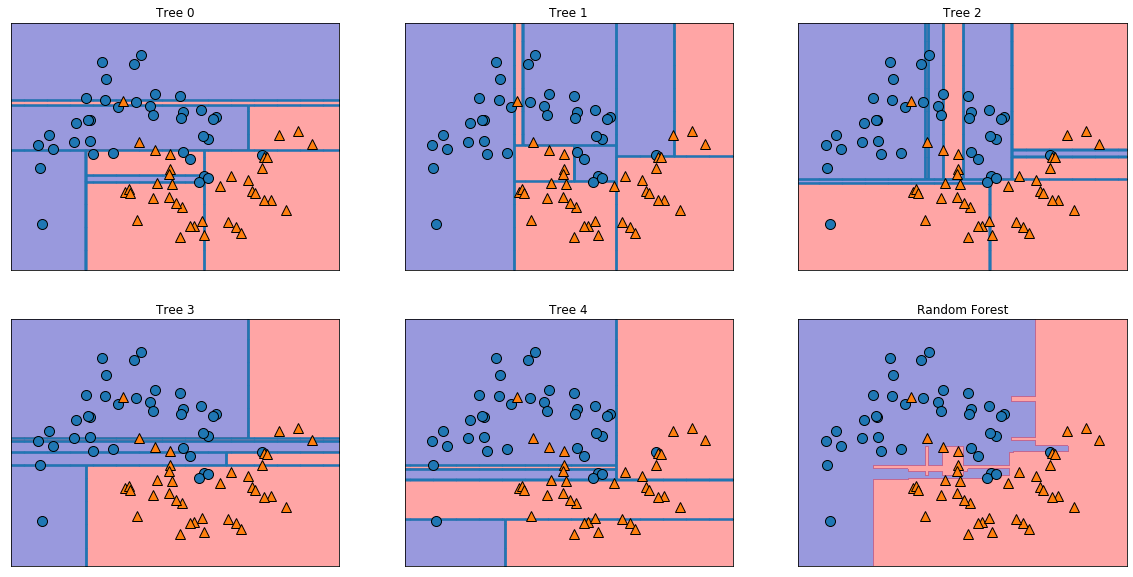

In [60]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill = True, ax = axes[-1, -1], alpha = 0.4)
axes[-1, -1].set_title('Random Forest')

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

The random forest overfits less than any of the trees individually, and provides a
much more intuitive decision boundary. In any real application, we would use many
more trees (often hundreds or thousands), leading to even smoother boundaries.

In [61]:
# apply random forest of 100 trees on the
# beast cancer dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print(f'accuracy on training set: {forest.score(X_train, y_train):.3f}')
print(f'accuracy on testing set: {forest.score(X_test, y_test):.3f}')


accuracy on training set: 1.000
accuracy on testing set: 0.972


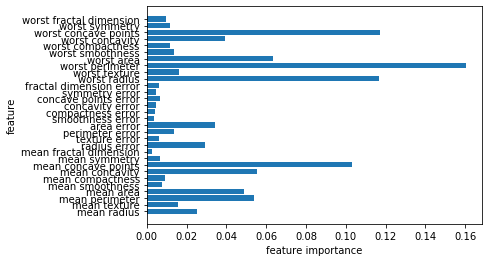

In [62]:
# feature importances of the RandomForest
plot_feature_importances_cancer(forest)

The randomness in building the random forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a single tree.

Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer. However, random
forests require more memory and are slower to train and to predict than linear models. If time and memory are important in an application, it might make sense to use a
linear model instead.

### __Gradient Boosting Machines__

The gradient boosted regression tree is another ensemble method that combines mul‐
tiple decision trees to create a more powerful model.
In contrast to the
random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster.

The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to
parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.

Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the learning_rate , which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators , also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

In [63]:
# gradient boosting example
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

print(f'accuracy on training set: {gbrt.score(X_train, y_train):.3f}')
print(f'accuracy on test set: {gbrt.score(X_test, y_test):.3f}')

accuracy on training set: 1.000
accuracy on test set: 0.965


In [64]:
# apply stronger pre-prunning by limiting the maximum
# depth
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)

print(f'accuracy on training set: {gbrt.score(X_train, y_train):.3f}')
print(f'accuracy on test set: {gbrt.score(X_test, y_test):.3f}')

accuracy on training set: 0.991
accuracy on test set: 0.972


In [65]:
# lowering the learning rate
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print(f'accuracy on training set: {gbrt.score(X_train, y_train):.3f}')
print(f'accuracy on test set: {gbrt.score(X_test, y_test):.3f}')

accuracy on training set: 0.988
accuracy on test set: 0.965


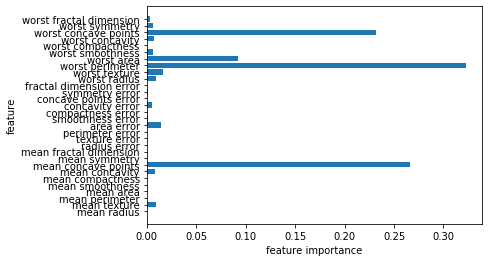

In [66]:
# visualize feature importance
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Gradient boosted decision trees are among the
most powerful and widely used models for supervised learning. Their main drawback
is that they require careful tuning of the parameters and may take a long time to
train. Similarly to other tree-based models, the algorithm works well without scaling
and on a mixture of binary and continuous features. As with other tree-based models,
it also often does not work well on high-dimensional sparse data.

## __Kernelized Support Vector Machines__

Kernelized support vector machines
(often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space. Similar concepts apply to support vector
regression, as implemented in SVR .

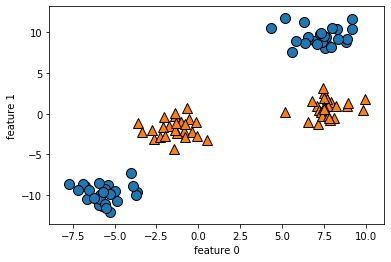

In [67]:
# create data to study SVM
X, y = make_blobs(centers = 4, random_state = 8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

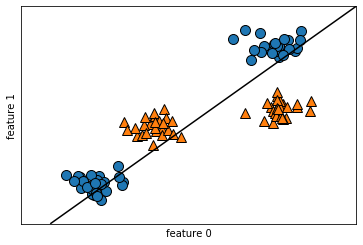

In [68]:
# let's try with a SVC
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5, 0, 'feature1 ** 2')

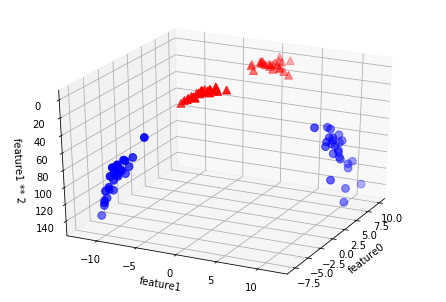

In [69]:
# add squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

# visualize in 3d
ax = Axes3D(figure, elev = -152, azim = -26)

# plot first all the points with y == 0, thaen all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
           cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
           marker = '^', cmap = mglearn.cm2, s = 60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

In the new representation of the data, it is now indeed possible to separate the two
classes using a linear model, a plane in three dimensions. We can confirm this by fitting a linear model to the augmented data

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature0')

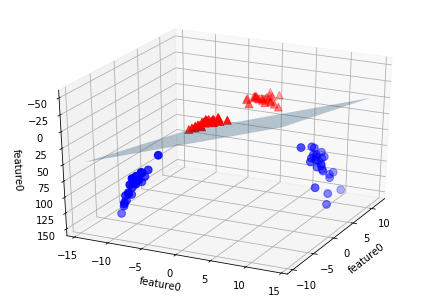

In [70]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
           cmap = mglearn.cm2, s = 60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r',
           marker = '^', cmap = mglearn.cm2, s = 60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature0')
ax.set_zlabel('feature0')


As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse, as you can see from the plot created here

Text(0, 0.5, 'Feature 1')

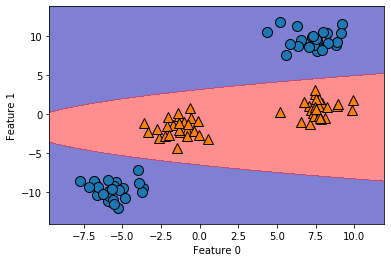

In [71]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The lesson here is that adding nonlinear features to the representation of our data can
make linear models much more powerful. However, often we don’t know which features to add, and adding many features (like all possible interactions in a 100-dimensional feature space) might make computation very expensive. Luckily, there is
a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the kernel trick, and it works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.

There are two ways to map your data into a higher-dimensional space that are commonly used with support vector machines: the polynomial kernel, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5 ); and the radial basis function (RBF) kernel, also known as the
Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to
an infinite-dimensional feature space. One way to explain the Gaussian kernel is that
it considers all possible polynomials of all degrees, but the importance of the features
decreases for higher degrees.


#### __Understanding SVMs__

During training, the SVM learns how important each of the training data points is to
represent the decision boundary between the two classes. Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called support vectors and give the support vector machine its name.

To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC ).

Text(0, 0.5, 'feature1')

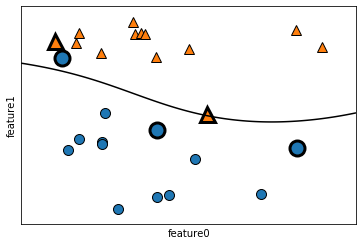

In [72]:
# training of an svm in a two-dimensional space
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_

# class labels of support vectorare given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15, markeredgewidth = 3)

plt.xlabel('feature0')
plt.ylabel('feature1')

#### __Tunning SVMs__

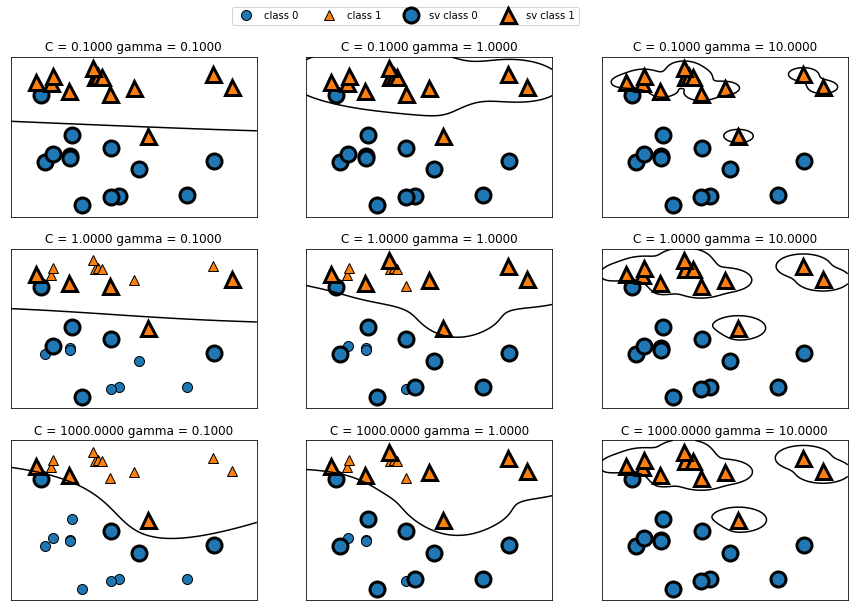

In [73]:
# varying of parameters
fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'],
                 ncol = 4, loc = (0.9, 1.2))

Going from left to right, we increase the value of the parameter __gamma__ from 0.1 to 10 .
A __small gamma means a large radius for the Gaussian kernel, which means that many
points are considered close by__. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. __A
low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model.__

Going from top to bottom, we increase the C parameter from 0.1 to 1000 . As with the
linear models, __a small C means a very restricted model__, where each data point can
only have very limited influence. You can see that at the top left the decision bound‐
ary looks nearly linear, with the misclassified points barely having any influence on
the line. __Increasing C , as shown on the bottom right, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.__

In [74]:
# apply rbf kernel to the breast cancer dataset
# by default C = 1 and gamma = 1 / n_features
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print(f'accuracy on training set: {svc.score(X_train, y_train):.3f}')
print(f'accuracy on test set: {svc.score(X_test, y_test):.3f}')

accuracy on training set: 0.904
accuracy on test set: 0.937


SVMs often perform quite well, they are
very sensitive to the settings of the parameters and to the scaling of the data. In particular, they require all the features to vary on a similar scale.

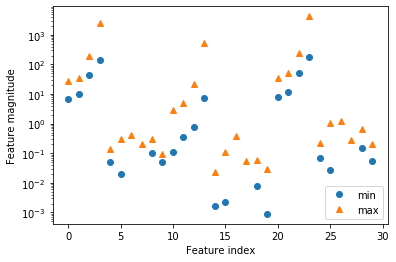

In [75]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

From this plot we can determine that features in the Breast Cancer dataset are of
completely different orders of magnitude. This can be somewhat of a problem for
other models (like linear models), but it has devastating effects for the kernel SVM.
Let’s examine some ways to deal with this issue.

#### __Preprocessing data for SVMs__
One way to resolve this problem is by rescaling each feature so that they are all
approximately on the same scale. A common rescaling method for kernel SVMs is to
scale the data such that all features are between 0 and 1.

In [76]:
# compute the min value per feature on the traiing set
min_on_training = X_train.min(axis = 0)

# compute the range of each feature(max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis = 0)

# subtract the min and divide by the range
# afterward, min = 0 and max = 1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training

print(f'minimum for each feature:\n{X_train_scaled.min(axis = 0)}')
print(f'maximum for each feature:\n{X_train_scaled.max(axis = 0)}')

minimum for each feature:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximum for each feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [77]:
# use the same transformation on the test set
X_test_scaled = (X_test - min_on_training) / range_on_training

In [78]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print(f'accuracy on training set: {svc.score(X_train_scaled, y_train):.2f}')
print(f'accuracy on training set: {svc.score(X_test_scaled, y_test):.2f}')


accuracy on training set: 0.98
accuracy on training set: 0.97


Scaling the data made a huge difference! Now we are actually in an underfitting
regime, where training and test set performance are quite similar but less close to
100% accuracy.

In [79]:
svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)

print(f'accuracy on training set: {svc.score(X_train_scaled, y_train):.2f}')
print(f'accuracy on training set: {svc.score(X_test_scaled, y_test):.2f}')

# actually last model was better than this one...

accuracy on training set: 1.00
accuracy on training set: 0.96


Kernelized support vector machines are powerful models and perform well on a variety of datasets. SVMs allow for complex decision boundaries, even if the data has only
a few features. They work well on low-dimensional and high-dimensional data (i.e.,
few and many features), but don’t scale very well with the number of samples. Running an SVM on data with up to 10,000 samples might work well, but working with
datasets of size 100,000 or more can become challenging in terms of runtime and
memory usage.
Another downside of SVMs is that they require careful preprocessing of the data and
tuning of the parameters. This is why, these days, most people instead use tree-based
models such as random forests or gradient boosting (which require little or no preprocessing) in many applications. Furthermore, SVM models are hard to inspect; it
can be difficult to understand why a particular prediction was made, and it might be
tricky to explain the model to a nonexpert.

The important parameters in kernel SVMs are the regularization parameter C , the
choice of the kernel, and the kernel-specific parameters. Although we primarily
focused on the RBF kernel, other choices are available in scikit-learn . The RBF
kernel has only one parameter, gamma , which is the inverse of the width of the Gaussian kernel. gamma and C both control the complexity of the model, with large values
in either resulting in a more complex model. Therefore, good settings for the two
parameters are usually strongly correlated, and C and gamma should be adjusted
together.

## __Neural Networks__

MLPs can be viewed as generalizations of linear models that perform multiple stages
of processing to come to a decision.

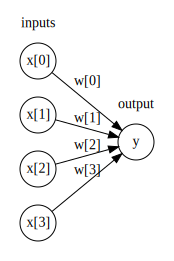

In [80]:
display(mglearn.plots.plot_logistic_regression_graph())

Here, each node on the left represents an input feature, the connecting lines represent
the learned coefficients, and the node on the right represents the output, which is a
weighted sum of the inputs.
In an MLP this process of computing weighted sums is repeated multiple times, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums to yield the final result

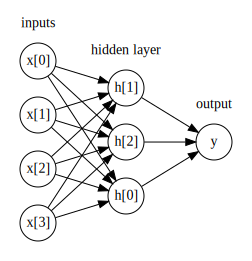

In [81]:
display(mglearn.plots.plot_single_hidden_layer_graph())

This model has a lot more coefficients (also called weights) to learn: there is one
between every input and every hidden unit (which make up the hidden layer), and
one between every unit in the hidden layer and the output.
Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result—usually the rectifying nonlinearity (also
known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of
this function is then used in the weighted sum that computes the output, ŷ
The relu cuts off values below zero, while tanh
saturates to –1 for low input values and +1 for high input values. Either nonlinear
function allows the neural network to learn much more complicated functions than a
linear model could:

Text(0, 0.5, 'relu(x), tanh(x)')

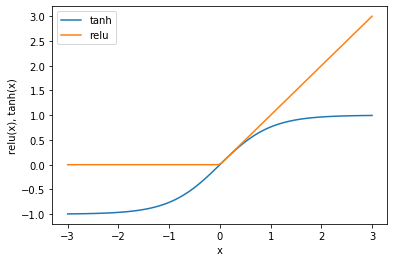

In [82]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0), label = 'relu')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

$$
h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3]) \\
h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3]) \\
h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3]) \\
ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]
$$


Here, w are the weights between the input x and the hidden layer h, and v are the
weights between the hidden layer h and the output ŷ. The weights v and w are learned
from data, x are the input features, ŷ is the computed output, and h are intermediate
computations. An important parameter that needs to be set by the user is the number
of nodes in the hidden layer. This can be as small as 10 for very small or simple data‐
sets and as big as 10,000 for very complex data.

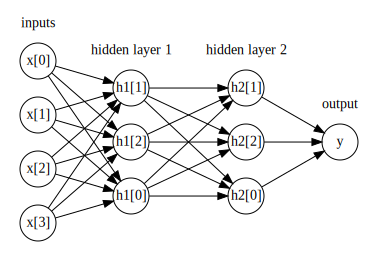

In [83]:
mglearn.plots.plot_two_hidden_layer_graph()

Having large neural networks made up of many of these layers of computation is
what inspired the term “deep learning.”

### __Tunning neural networks__

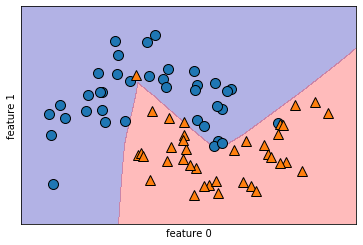

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(random_state = 0, max_iter = 10000).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.show()

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good result

Text(0, 0.5, 'feature 1')

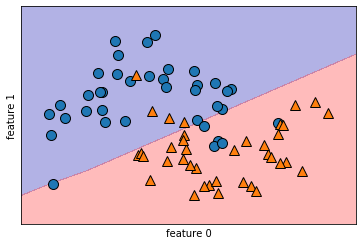

In [85]:
mlp = MLPClassifier(random_state = 0, max_iter = 10000, hidden_layer_sizes = [10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')


Text(0, 0.5, 'feature 1')

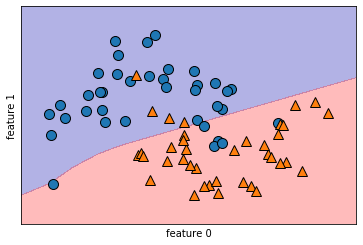

In [86]:
# using two hidden layers with 10 units each
mlp = MLPClassifier(max_iter = 10000, random_state = 0, hidden_layer_sizes = [10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')


Text(0, 0.5, 'feature 1')

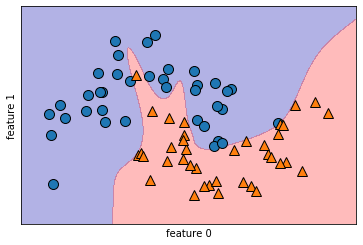

In [87]:
# using two hiddge layers, with 10 units each with tnah nonlinearity
mlp = MLPClassifier(
    solver = 'lbfgs',
    activation = 'tanh',
    random_state = 42,
    hidden_layer_sizes = [10, 10],
    max_iter = 1000
)

mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifiers. The parameter for this in the MLPClassifier is alpha (as in the linear regression
models), and it’s set to a very low value (little regularization) by default.

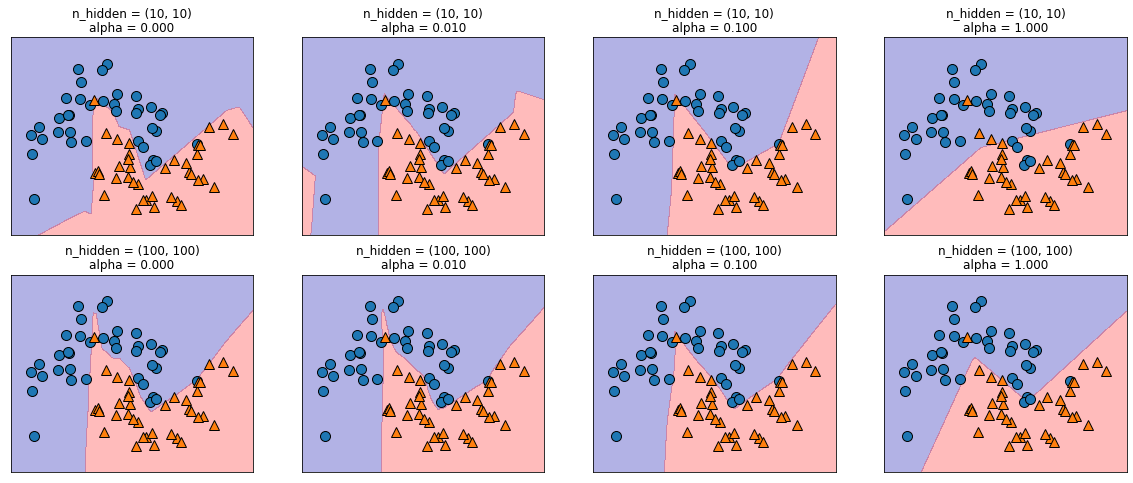

In [88]:
fig, axes = plt.subplots(2, 4, figsize = (20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(
            solver = 'lbfgs',
            random_state = 0,
            hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],
            alpha = alpha,
            max_iter = 10000
        )
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3, ax = ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax = ax)
        ax.set_title(f'n_hidden = ({n_hidden_nodes}, {n_hidden_nodes})\nalpha = {alpha:.3f}')
plt.show()

An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds. If the networks are
large, and their complexity is chosen properly, this should not affect accuracy too
much, but it is worth keeping in mind (particularly for smaller networks).

In [89]:
# apply neural networks to cancer data set
print(
    f'cancer data per-featire maxima:\n{cancer.data.max(axis = 0)}'
)

cancer data per-featire maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [90]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

print(f'accuracy on training set: {mlp.score(X_train, y_train):.2f}')
print(f'accuracy on test set: {mlp.score(X_test, y_test):.2f}')

accuracy on training set: 0.94
accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, and
a variance of 1. We must rescale our data so that it fulfills these requirements.

In [91]:
# compute mean value per feature on training set
mean_on_train = X_train.mean(axis = 0)

# compute the std deviation of each feature on the training set
std_on_train = X_train.std(axis = 0)

# subtract the mean and scale by inverse standard deviation
# afterward mean = 0 and std.dev = 1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use the same transgormation (using training mean and std on the test set)
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print(f'accuracy on training set: {mlp.score(X_train_scaled, y_train):.3f}')
print(f'accuracy on test set: {mlp.score(X_test_scaled, y_test):.3f}')

accuracy on training set: 0.991
accuracy on test set: 0.965


/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [92]:
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print(f'accuracy on training set: {mlp.score(X_train_scaled, y_train):.3f}')
print(f'accuracy on test set: {mlp.score(X_test_scaled, y_test):.3f}')

accuracy on training set: 1.000
accuracy on test set: 0.972


Increasing the number of iterations only increased the training set performance, not
the generalization performance. Still, the model is performing quite well. As there is
some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. Here, we choose to
increase the alpha parameter (quite aggressively, from 0.0001 to 1 ) to add stronger
regularization of the weights:

In [93]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print(f'accuracy on training set: {mlp.score(X_train_scaled, y_train):.3f}')
print(f'accuracy on test set: {mlp.score(X_test_scaled, y_test):.3f}')

accuracy on training set: 0.988
accuracy on test set: 0.972


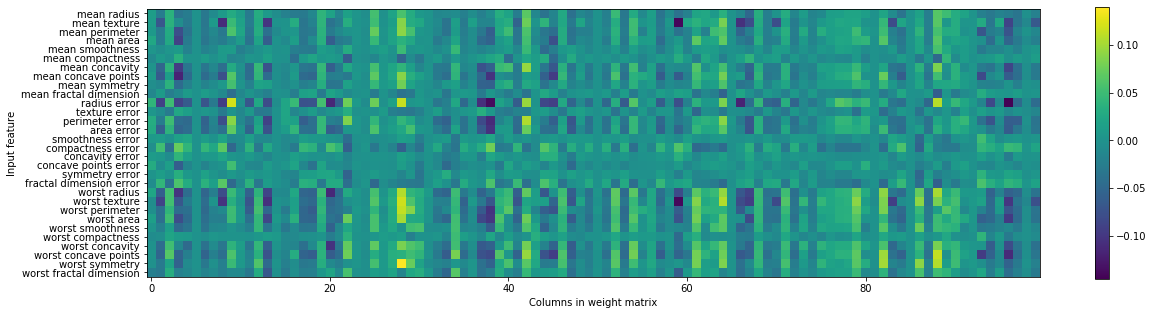

In [94]:
# visualize the mlp weights coefficients
plt.figure(figsize = (20, 5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(0, 30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()
plt.show()

Neural networks have reemerged as state-of-the-art models in many applications of
machine learning. One of their main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models.
Given enough computation time, data, and careful tuning of the parameters, neural
networks often beat other machine learning algorithms (for classification and regression tasks).

This brings us to the downsides. Neural networks—particularly the large and powerful ones—often take a long time to train. They also require careful preprocessing of
the data, as we saw here. Similarly to SVMs, they work best with “homogeneous”
data, where all the features have similar meanings. For data that has very different
kinds of features, tree-based models might work better. Tuning neural network
parameters is also an art unto itself. In our experiments, we barely scratched the surface of possible ways to adjust neural network models and how to train them.

__A common way to adjust parameters in a neural network is to first create a network
that is large enough to overfit, making sure that the task can actually be learned by
the network. Then, once you know the training data can be learned, either shrink the
network or increase alpha to add regularization, which will improve generalization
performance.__

- Adam is sensitive to data scale

## __Uncertainty Estimates from Classifiers__

Another useful part of the scikit-learn interface that we haven’t talked about yet is
the ability of classifiers to provide uncertainty estimates of predictions. Often, you are
not only interested in which class a classifier predicts for a certain test point, but also
how certain it is that this is the right class.

There are two different functions in scikit-learn that can be used to obtain uncertainty estimates from classifiers: decision_function and predict_proba . Most (but
not all) classifiers have at least one of them, and many classifiers have both. Let’s look
at what these two functions do on a synthetic two-dimensional dataset, when building a GradientBoostingClassifier classifier, which has both a decision_function
and a predict_proba method:

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

# we rename the classes 'blue' and 'red'
y_names = np.array(['blue', 'red'])[y]

# we can call train_test_split with arbitrarily many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_names, y, random_state = 0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
# In the binary classification case, the return value of
# decision_function is of shape (n_samples,) ,
# and it returns one floating-point number for each sample:
print(f'X_test.shape: ', X_test.shape)
print(f'Decision function shape: ', gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
Decision function shape:  (25,)


This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1. Positive values indicate a preference for the positive class, and negative values indicate a preference for the “negative” (other) class:

In [97]:
# show the first few entries of decision_function
print(f'decision function:\n{gbrt.decision_function(X_test)[:6]}')

decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


We can recover the prediction by looking only at the sign of the decision function:

In [98]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


For binary classification, the “negative” class is always the first entry of the classes_
attribute, and the “positive” class is the second entry of classes_ . So if you want to
fully recover the output of predict , you need to make use of the classes_ attribute:

In [99]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]

# pred is the same as the output of gbrt.predict
print(f'pred is equal to predictions: {np.all(pred == gbrt.predict(X_test))}')

pred is equal to predictions: True


In [100]:
# the rande of decision_function
# can be arbitrary, and depends on the data and the model
# parameters
decision_function = gbrt.decision_function(X_test)

print(f'decision function minimum: {np.min(decision_function):.2f}, maximum: {np.max(decision_function):.2f}')

decision function minimum: -7.69, maximum: 4.29


In the following example we plot the decision_function for all points in the 2D
plane using a color coding, next to a visualization of the decision boundary, as we saw
earlier. We show training points as circles and test data as triangles

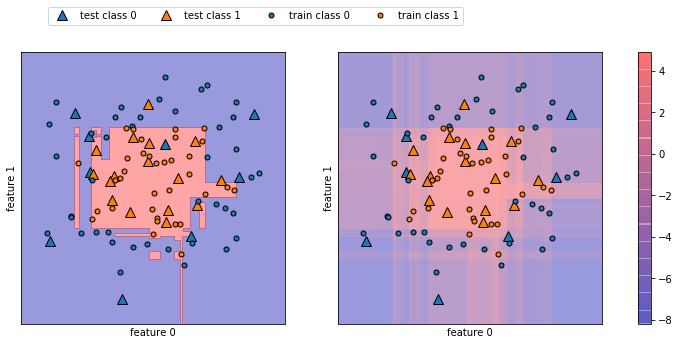

In [101]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax = axes[0], alpha = 0.4,
                                fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax = axes[1],
                                            alpha = 0.4, cm = mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(
        X_test[:, 0], X_test[:, 1], y_test,
        markers = '^', ax = ax
    )
    mglearn.discrete_scatter(
        X_train[:, 0], X_train[:, 1], y_train,
        markers = '.', ax = ax
    )
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

cbar = plt.colorbar(scores_image, ax = axes.tolist())

axes[0].legend(
    ['test class 0', 'test class 1', 'train class 0', 'train class 1'],
    ncol = 4, loc = (0.1, 1.1)
)

plt.show()

## __Predicting Probabilities__

The output of predict_proba is a probability for each class, and is often more easily
understood than the output of decision_function . It is always of shape (n_samples,
2) for binary classification:

In [102]:
print(f'Shape of probabilities: {gbrt.predict_proba(X_test).shape}')

# show first entries of predict proba
print('Predicted probabilities:\n', gbrt.predict_proba(X_test[:5]))

Shape of probabilities: (25, 2)
Predicted probabilities:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]]


__How well the uncertainty actually reflects uncertainty in the data depends on
the model and the parameters. A model that is more overfitted tends to make more
certain predictions, even if they might be wrong. A model with less complexity usually has more uncertainty in its predictions. A model is called calibrated if the
reported uncertainty actually matches how correct it is—in a calibrated model, a prediction made with 70% certainty would be correct 70% of the time.__

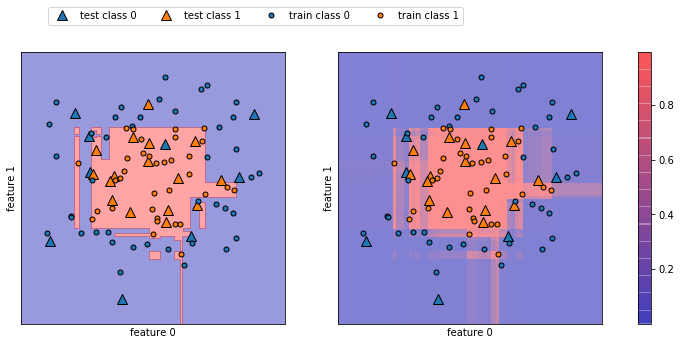

In [103]:
# show decision boundary on the dataset, next to the
# class probabilities for the class 1
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax = axes[0], alpha = 0.4, fill = True, cm = mglearn.cm2
)

scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax = axes[1], alpha = 0.5, cm = mglearn.ReBl, function = 'predict_proba'
)

for ax in axes:
    # plot training and test pooints
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers = '^', ax = ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers = '.', ax = ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

cbar = plt.colorbar(scores_image, ax = axes.tolist())

axes[0].legend(
    ['test class 0', 'test class 1', 'train class 0', 'train class 1'],
    ncol = 4, loc = (0.1, 1.1)
)

plt.show()

## __Uncertainty in Multiclass Classification__

In [104]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 42
)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0).fit(X_train, y_train)

In [105]:
print('Decision function shape: ', gbrt.decision_function(X_test).shape)

# print the first few entries
print('Decision function:\n', gbrt.decision_function(X_test)[:6, :])

Decision function shape:  (38, 3)
Decision function:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In the multiclass case, the decision_function has the shape (n_samples,
n_classes) and each column provides a “certainty score” for each class, where a large
score means that a class is more likely and a small score means the class is less likely.
You can recover the predictions from these scores by finding the maximum entry for
each data point:

In [106]:
print(
    'argmax of decision function:\n', np.argmax(gbrt.decision_function(X_test), axis = 1)
)

print(
    'predictions:\n', gbrt.predict(X_test)
)

argmax of decision function:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [107]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n", gbrt.predict_proba(X_test)[:6])

# show that sums across rows are one
print("Sums: ", gbrt.predict_proba(X_test)[:6].sum(axis = 1))

Predicted probabilities:
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums:  [1. 1. 1. 1. 1. 1.]


In [108]:
# We can again recover the predictions by computing the argmax of predict_proba :
print('Argmax of predicted probabilities:\n', np.argmax(gbrt.predict_proba(X_test), axis = 1))
print("Predictions:\n", gbrt.predict(X_test))

Argmax of predicted probabilities:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


To summarize, predict_proba and decision_function always have shape (n_sam
ples, n_classes) —apart from decision_function in the special binary case. In the
binary case, decision_function only has one column, corresponding to the “positive” class classes_[1] . This is mostly for historical reasons.
You can recover the prediction when there are n_classes many columns by computing the argmax across columns. Be careful, though, if your classes are strings, or you
use integers but they are not consecutive and starting from 0. If you want to compare
results obtained with predict to results obtained via decision_function or pre
dict_proba , make sure to use the classes_ attribute of the classifier to get the actual
class names:

In [109]:
logreg = LogisticRegression(max_iter = 10000)

# represent each target bu its class name and
# the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)

print('unique classes in training data: ', logreg.classes_)
print('predictions: ', logreg.predict(X_test[:5]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis = 1)

print('argmax of decision function: ', argmax_dec_func[:5])
print('argmax combined with classes_: ', logreg.classes_[argmax_dec_func][:10])

unique classes in training data:  ['setosa' 'versicolor' 'virginica']
predictions:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
argmax of decision function:  [1 0 2 1 1]
argmax combined with classes_:  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


# __Summary and outlook__

 - __Generalization__: A model that is able to perform well on new, previously unseen data
 
 - __Underfitting__: Describes a model that cannot capture tje variations present in the training data
 
 - __Overfitting__: Describes a model that focuses too much on the training data and is not able to generalize to new data very well.
 
### Major types of Supervised Learning problems: 
 - __Regression__: A model that predicts data in the continuous space
 
 - __Classification__: A model that predicts data in discrete space
 
### When to use each model:
 - __Nearest Neighbors__: For small datasets, good as baseline, easy to explain.
 - __Linear models__: Go-to as a first algorithm to try, good for very large datasets,
   good for very high dimensional data.
 - __Naive Bayes__: Only for classification. Even faster than linear models, good for 
   very large datasets and high.dimensional data. Often less accurate than linear models.
 - __Decision Trees__: Very fast, don't need scaling of the data, can be visualized and easily explained.
 - __Random Forests__: Nearly always perform better than a single decision tree, very robust and powerful.
   Don't need scaling of data. Not good for very high-dimensional sparse data.
 - __Gradient Boosted Decision Trees__:Often slightly more accurate than random forests. Slower to train but
   faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
 - __Support Vector Machnes__: Powerful for medium sized datasets of features with similar meaning.
   Require scaling of data, sensitive to parameters.
 - __Neural Networks__:
   Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and 
   to the choice of parameters. Large models need a long time to train.

When working with a new dataset, it is in general a good idea to start with a simple
model, such as a linear model or a naive Bayes or nearest neighbors classifier, and see
how far you can get. After understanding more about the data, you can consider
moving to an algorithm that can build more complex models, such as random forests,
gradient boosted decision trees, SVMs, or neural networks.